# Part 1 ‑ Exploratory data analysis

_The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them._

***

In [51]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [29]:
login_df=pd.read_json('logins.json')

In [30]:
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [31]:
len(login_df)

93142

In [18]:
login_df.loc[0]

login_time   1970-01-01 20:13:18
Name: 0, dtype: datetime64[ns]

In [32]:
login_df=login_df.set_index('login_time')

In [46]:
#given time range
login_df.index.min(), login_df.index.max()

(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'))

In [24]:
#login_df['login_time'].resample('45Min').size()
login_df['login_time']=pd.to_datetime(login_df['login_time'])#.resample('45Min').size()

In [34]:
login_15min_agg=login_df.resample('15Min').size()

In [36]:
login_15min_agg.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

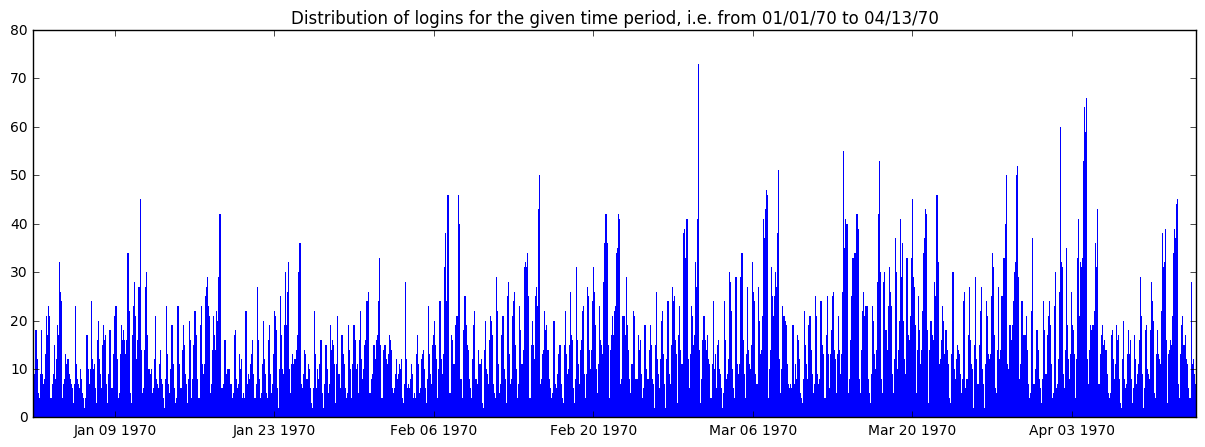

In [50]:
f,ax=plt.subplots(figsize=(15,5))
plt.title('Distribution of logins for the given time period, i.e. from 01/01/70 to 04/13/70')
plt.bar(login_15min_agg.index,login_15min_agg.values,width=0.1,edgecolor='None')
plt.show()

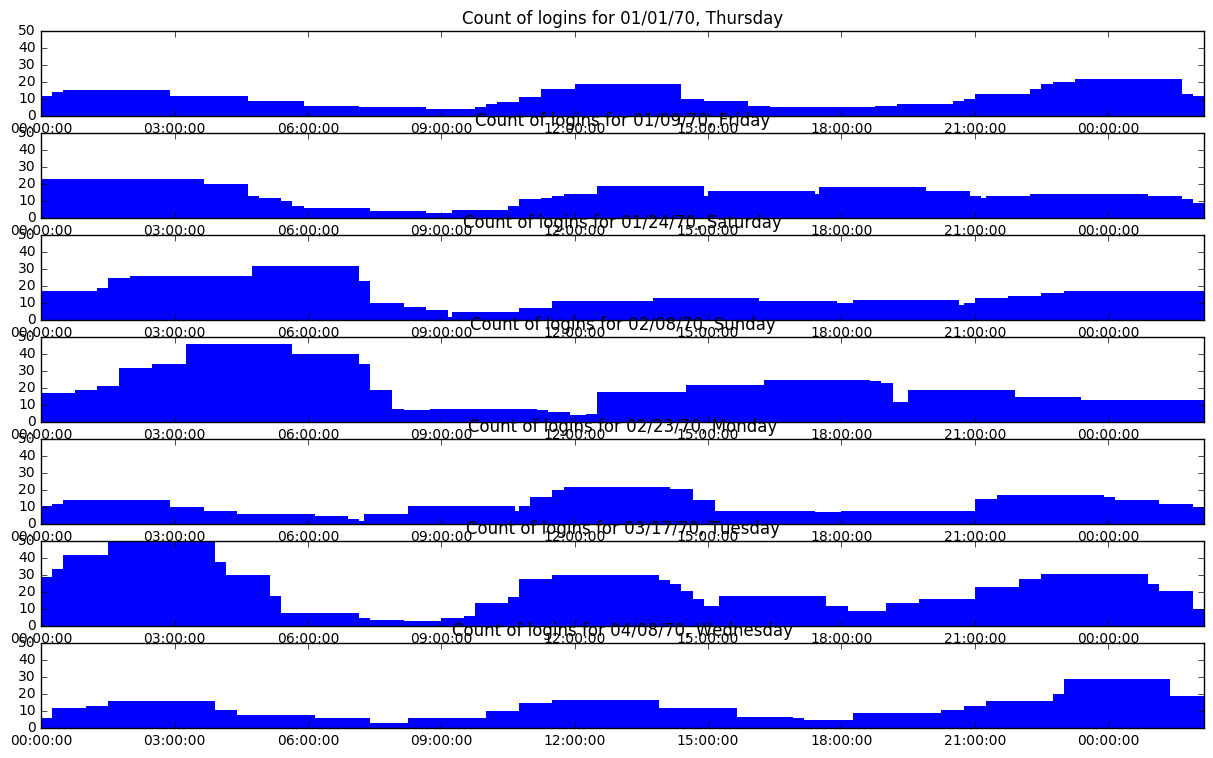

In [88]:
#let us look at the distibution of an arbitary 7 days, with 1 day for each day of the week
#1st Jan - Thu, 9th Jan - Fri, 24th Jan - Sat, etc.
f,ax=plt.subplots(nrows=7, ncols=1, figsize=(15,9))
ax1,ax2,ax3,ax4,ax5,ax6,ax7=ax.flatten()

#for 01/01/70
ax1.set_title('Count of logins for 01/01/70, '+pd.to_datetime('1970-01-22').weekday_name)
ax1.bar(login_15min_agg['1970-01-22'].index,login_15min_agg['1970-01-22'].values,width=0.1,edgecolor='None')
ax1.set_ylim(0,50)

#for 01/09/70
ax2.set_title('Count of logins for 01/09/70, '+pd.to_datetime('1970-01-09').weekday_name)
ax2.bar(login_15min_agg['1970-01-09'].index,login_15min_agg['1970-01-09'].values,width=0.1,edgecolor='None')
ax2.set_ylim(0,50)


#for 01/24/70
ax3.set_title('Count of logins for 01/24/70, '+pd.to_datetime('1970-01-24').weekday_name)
ax3.bar(login_15min_agg['1970-01-24'].index,login_15min_agg['1970-01-24'].values,width=0.1,edgecolor='None')
ax3.set_ylim(0,50)

#for 02/08/70
ax4.set_title('Count of logins for 02/08/70, '+pd.to_datetime('1970-02-08').weekday_name)
ax4.bar(login_15min_agg['1970-02-08'].index,login_15min_agg['1970-02-08'].values,width=0.1,edgecolor='None')
ax4.set_ylim(0,50)


#for 02/23/70
ax5.set_title('Count of logins for 02/23/70, '+pd.to_datetime('1970-02-23').weekday_name)
ax5.bar(login_15min_agg['1970-02-23'].index,login_15min_agg['1970-02-23'].values,width=0.1,edgecolor='None')
ax5.set_ylim(0,50)


#for 03/17/70
ax6.set_title('Count of logins for 03/17/70, '+pd.to_datetime('1970-03-17').weekday_name)
ax6.bar(login_15min_agg['1970-03-17'].index,login_15min_agg['1970-03-17'].values,width=0.1,edgecolor='None')
ax6.set_ylim(0,50)

#for 04/08/70
ax7.set_title('Count of logins for 04/08/70, '+pd.to_datetime('1970-04-08').weekday_name)
ax7.bar(login_15min_agg['1970-04-08'].index,login_15min_agg['1970-04-08'].values,width=0.1,edgecolor='None')
ax7.set_ylim(0,50)


plt.show()

In [110]:
ts_day_df=pd.DataFrame(login_15min_agg).reset_index()

In [111]:
ts_day_df['Date']=ts_day_df['login_time'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [112]:
ts_day_df['Time']=ts_day_df['login_time'].apply(lambda x: x.strftime('%H-%M'))

In [113]:
ts_day_df.columns=['LoginTS','LoginCount','LoginDate','LoginTime']

In [114]:
ts_day_df['DayOfWeek']=ts_day_df['LoginTS'].apply(lambda x:x.weekday_name)

In [115]:
ts_day_df.head()

,LoginTS,LoginCount,LoginDate,LoginTime,DayOfWeek
0,1970-01-01 20:00:00,2,1970-01-01,20-00,Thursday
1,1970-01-01 20:15:00,6,1970-01-01,20-15,Thursday
2,1970-01-01 20:30:00,9,1970-01-01,20-30,Thursday
3,1970-01-01 20:45:00,7,1970-01-01,20-45,Thursday
4,1970-01-01 21:00:00,1,1970-01-01,21-00,Thursday


In [125]:
avg_by_weekday_df=pd.DataFrame(ts_day_df[['DayOfWeek','LoginTime','LoginCount']].groupby(['DayOfWeek','LoginTime']).mean()).reset_index()

In [126]:
avg_by_weekday_df.head()

,DayOfWeek,LoginTime,LoginCount
0,Friday,00-00,15.800000
1,Friday,00-15,17.533333
2,Friday,00-30,15.466667
3,Friday,00-45,16.200000
4,Friday,01-00,17.266667


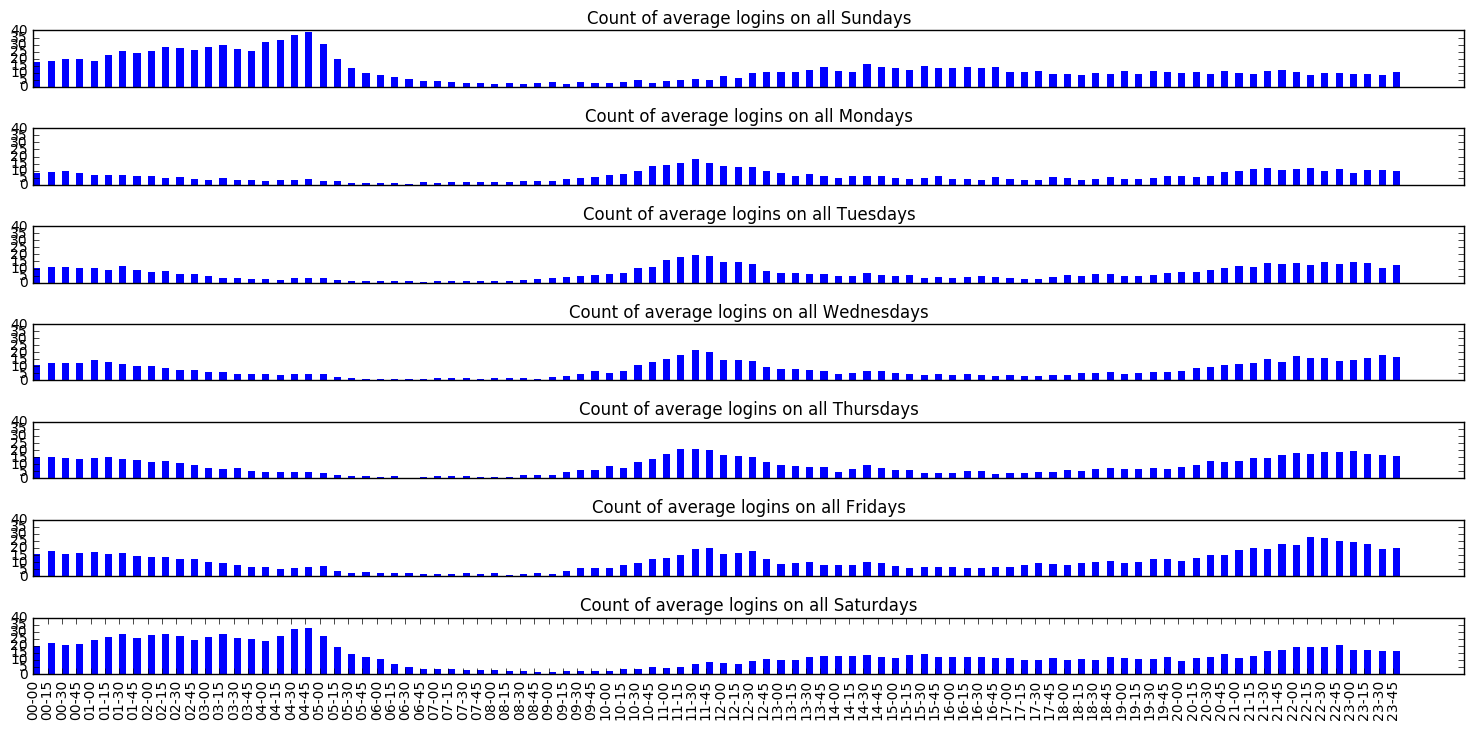

In [153]:
#avg_by_weekday_df[avg_by_weekday_df.DayOfWeek=='Friday']['LoginTime']
f,ax=plt.subplots(nrows=7, ncols=1, figsize=(15,7))
f.tight_layout()
ax1,ax2,ax3,ax4,ax5,ax6,ax7=ax.flatten()

#for Sunday
ax1.set_title('Count of average logins on all Sundays')
day='Sunday'
w=0.5 #width
ax1.bar(np.arange(len(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'])),
       avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'],
       width=w,edgecolor='None')
ax1.xaxis.set_visible(False)
ax1.set_ylim(0,40)

#for Mondays
day='Monday'
ax2.set_title('Count of average logins on all '+day+'s')
ax2.bar(np.arange(len(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'])),
       avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'],
       width=w,edgecolor='None')
ax2.xaxis.set_visible(False)
ax2.set_ylim(0,40)

#for Tuesdays
day='Tuesday'
ax3.set_title('Count of average logins on all '+day+'s')
ax3.bar(np.arange(len(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'])),
       avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'],
       width=w,edgecolor='None')
ax3.xaxis.set_visible(False)
ax3.set_ylim(0,40)

#for Wednesdays
day='Wednesday'
ax4.set_title('Count of average logins on all '+day+'s')
ax4.bar(np.arange(len(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'])),
       avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'],
       width=w,edgecolor='None')
ax4.xaxis.set_visible(False)
ax4.set_ylim(0,40)

#for Thursdays
day='Thursday'
ax5.set_title('Count of average logins on all '+day+'s')
ax5.bar(np.arange(len(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'])),
       avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'],
       width=w,edgecolor='None')
ax5.xaxis.set_visible(False)
ax5.set_ylim(0,40)

#for Fridays
day='Friday'
ax6.set_title('Count of average logins on all '+day+'s')
ax6.bar(np.arange(len(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'])),
       avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'],
       width=w,edgecolor='None')
ax6.xaxis.set_visible(False)
ax6.set_ylim(0,40)

#for Saturdays
day='Saturday'
ax7.set_title('Count of average logins on all '+day+'s')
ax7.bar(np.arange(len(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'])),
       avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'],
       width=w,edgecolor='None')
ax7.set_xticks(np.arange(len(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginCount'])))
ax7.set_xticklabels(avg_by_weekday_df[avg_by_weekday_df.DayOfWeek==day]['LoginTime'],rotation=90)
ax7.set_ylim(0,40)



plt.show()

### Findings

The above charts show a clear pattern of the demand. There are two broad categories of demand patterns
1. Weekend pattern, i.e. Friday evening through Sunday midnight
2. Weekday patter, i.e. the rest of the day / time

During the weekends, the demand is high throughout the night, i.e. from 9 p.m. until 6 p.m. During the day time, i.e. from noon until evening, the demand is low but is steady.

During the weekdays, there is a spike in demand from 10 a.m. through 2 p.m. This is followed by a small spike in demand in the late evenings, i.e. from 8 p.m. until 1 a.m.
***

In [82]:
'Count of logins for 01/01/70, '+pd.to_datetime('1970-01-01').weekday_name

'Count of logins for 01/01/70, Thursday'

In [61]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.io import output_notebook,show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool

Loading BokehJS ...

In [66]:
p = figure(plot_width=900, plot_height=300,title="Count of logins", 
           x_axis_label='Time', 
           y_axis_label='Count',
           tools="pan,wheel_zoom,box_zoom,reset",
           x_axis_type="datetime")
#p.add_tools(hover)
#p.vbar(x=np.arange(len(login_15min_agg.index)), top=login_15min_agg.values,width=0.5,color='red')
p.vbar(x=login_15min_agg.index, top=login_15min_agg.values,width=0.5,color='red')
p.legend.location = "top_right"
#p.legend.click_policy="hide"
show(p)

In [67]:
login_15min_agg.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')